<a href="https://colab.research.google.com/github/nkchaithu/Titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
gs=pd.read_csv("gender_submission.csv")
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")

In [3]:
print(gs.shape,test.shape,train.shape)

(418, 2) (418, 11) (891, 12)


In [6]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [8]:
gs.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

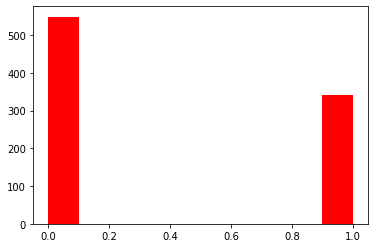

In [13]:
import matplotlib.pyplot as plt
plt.hist(train['Survived'],color="red")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

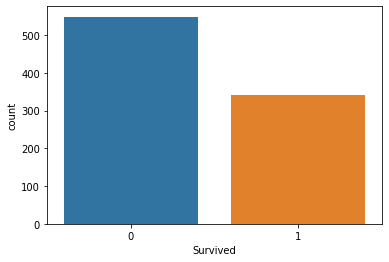

In [14]:
import seaborn as sns
sns.countplot(train['Survived'],label='count')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

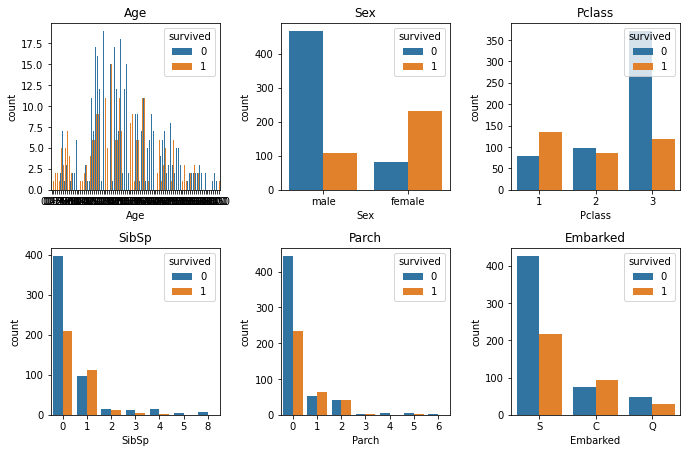

In [15]:
cols = ['Age','Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_cols = 3

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(train[cols[i]], hue=train["Survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout() 

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


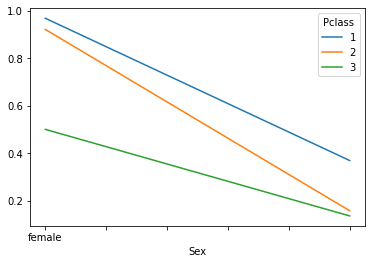

In [16]:
train.pivot_table('Survived', index='Sex', columns='Pclass').plot()
train.pivot_table('Survived', index='Sex', columns='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

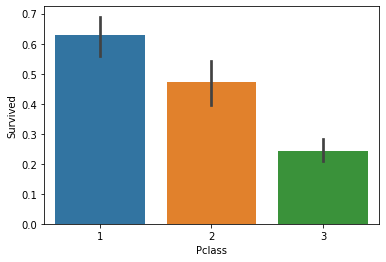

In [17]:
sns.barplot(x='Pclass', y='Survived', data=train)

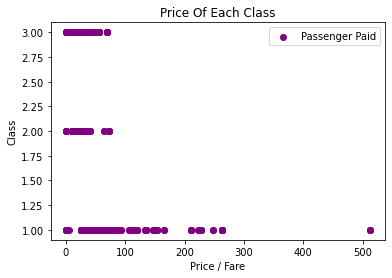

In [18]:
plt.scatter(train['Fare'], train['Pclass'],  color = 'purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

In [19]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
train['Age'].mean()

29.69911764705882

In [47]:
train['Age']=train['Age'].fillna(30)
test['Age']=test['Age'].fillna(30)

In [46]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age              0
dtype: int64

In [48]:
train = train.drop(['Cabin'], axis=1)
test=test.drop(['Cabin'],axis=1)

In [49]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Age            0
dtype: int64

In [50]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
train["Embarked"]=train['Embarked'].fillna('S')
test['Embarked']= test['Embarked'].fillna('S')

In [53]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Age            0
dtype: int64

In [54]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Age            float64
dtype: object

In [55]:
def gender_no(gender):
    if gender=="male":
        return 0
    return 1
def emb(s):
    if s=='S':
        return 0
    if s=='C':
        return 1
    return 2

In [56]:
train['Sex']=train["Sex"].apply(gender_no)
test['Sex']=test["Sex"].apply(gender_no)
train['Embarked']=train["Embarked"].apply(emb)
test['Embarked']=test["Embarked"].apply(emb)


In [57]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
Age            float64
dtype: object

In [58]:
train = train.drop(['Ticket'], axis=1)
test=test.drop(['Ticket'],axis=1)

In [59]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
Age            float64
dtype: object

In [60]:
test.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
Age            float64
dtype: object

In [62]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,1,0,3,0,1,0,7.25,0,22.0


In [63]:
test.head(1)

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,892,3,0,0,0,7.8292,2,34.5


In [64]:
gs.head(1)

,PassengerId,Survived
0,892,0


In [65]:
trainc=list(train.columns)
testc=list(test.columns)
trainc[0],trainc[1]=trainc[1],trainc[0]
testc[0],testc[1]=testc[1],testc[0]

In [66]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,1,0,3,0,1,0,7.25,0,22.0


In [69]:
train["Survival"]=train["Survived"]

In [70]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age,Survival
0,1,0,3,0,1,0,7.25,0,22.0,0


In [71]:
train = train.drop(['Survived'], axis=1)

In [72]:
train.head(1)

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age,Survival
0,1,3,0,1,0,7.25,0,22.0,0


In [81]:
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Age            0
dtype: int64

In [82]:
test["Fare"].value_counts()

7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: Fare, Length: 169, dtype: int64

In [83]:
test["Fare"]=test['Fare'].fillna(7.75)

In [85]:
X_train = train.iloc[:,:-1].values 
Y_train = train.iloc[:, -1].values 

In [86]:
Y_test=gs.iloc[:,1].values
X_test=test.iloc[:,:].values

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [88]:
def models(X_train,Y_train):
    
    #Using Logistic Regression Algorithm to the Training Set
	from sklearn.linear_model import LogisticRegression
	log = LogisticRegression(random_state = 0)
	log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
	from sklearn.neighbors import KNeighborsClassifier
	knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
	knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
	from sklearn.svm import SVC
	svc_lin = SVC(kernel = 'linear', random_state = 0)
	svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
	from sklearn.svm import SVC
	svc_rbf = SVC(kernel = 'rbf', random_state = 0)
	svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
	from sklearn.naive_bayes import GaussianNB
	gauss = GaussianNB()
	gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
	from sklearn.tree import DecisionTreeClassifier
	tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
	tree.fit(X_train, Y_train)

	#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
	from sklearn.ensemble import RandomForestClassifier
	forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
	forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
	print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
	print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
	print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
	print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
	print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
	print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
	print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
	return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [89]:
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.8035914702581369
[1]K Nearest Neighbor Training Accuracy: 0.8653198653198653
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7867564534231201
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8462401795735129
[4]Gaussian Naive Bayes Training Accuracy: 0.7934904601571269
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9820426487093153


In [90]:
from sklearn.metrics import confusion_matrix 
for i in range(len(model)):

	cm = confusion_matrix(Y_test, model[i].predict(X_test)) 
   #extracting TN, FP, FN, TP
	TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
	print(cm)
	print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
	print()# Print a new line

[[249  17]
 [  8 144]]
Model[0] Testing Accuracy = "0.9401913875598086 !"

[[238  28]
 [ 34 118]]
Model[1] Testing Accuracy = "0.8516746411483254 !"

[[266   0]
 [  0 152]]
Model[2] Testing Accuracy = "1.0 !"

[[255  11]
 [ 16 136]]
Model[3] Testing Accuracy = "0.9354066985645934 !"

[[242  24]
 [  7 145]]
Model[4] Testing Accuracy = "0.9258373205741627 !"

[[235  31]
 [ 61  91]]
Model[5] Testing Accuracy = "0.7799043062200957 !"

[[234  32]
 [ 45 107]]
Model[6] Testing Accuracy = "0.8157894736842105 !"



In [91]:
import numpy as np
forest = model[6]
importances = pd.DataFrame({'feature':train.iloc[:,:-1].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Fare,0.225
PassengerId,0.211
Sex,0.200
Age,0.192
Pclass,0.062
SibSp,0.043
Parch,0.039
Embarked,0.027


<AxesSubplot:xlabel='feature'>

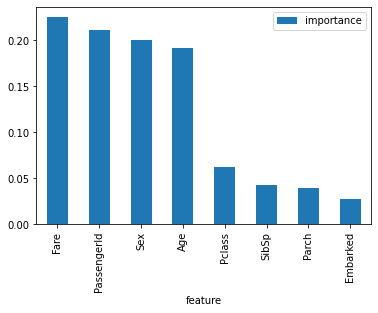

In [92]:
importances.plot.bar()

In [93]:
pred = model[6].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(Y_test)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0
 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0


In [96]:
confusion_matrix(pred,Y_test)

array([[234,  45],
       [ 32, 107]])